In [1]:
pip install requests beautifulsoup4 pandas selenium


   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.4 MB 178.6 kB/s eta 0:00:53
   ---------------------------------------- 0.1/9.4 MB 297.7 kB/s eta 0:00:32
    --------------------------------------- 0.1/9.4 MB 300.4 kB/s eta 0:00:31
    --------------------------------------- 0.1/9.4 MB 274.5 kB/s eta 0:00:34
    --------------------------------------- 0.2/9.4 MB 291.0 kB/s eta 0:00:32
    --------------------------------------- 0.2/9.4 MB 289.5 kB/s eta 0:00:32
    --------------------------------------- 0.2/9.4 MB 280.7 kB/s eta 0:00:33
   - -------------------------------------- 0.3/9.4 MB 280.9 kB/s eta 0:00:33
   - -------------------------------------- 0.3/9.4 MB 274.8 kB/s eta 0:00:34
   - -------------------------------------- 0.3/9.4 MB 260.1 kB/s eta 0:00:35
   - -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openbb-sec 1.4.0 requires lxml<6.0.0,>=5.2.1, but you have lxml 4.9.4 which is incompatible.


   -------------------- ------------------- 4.9/9.4 MB 235.1 kB/s eta 0:00:20
   -------------------- ------------------- 4.9/9.4 MB 235.0 kB/s eta 0:00:19
   -------------------- ------------------- 4.9/9.4 MB 235.0 kB/s eta 0:00:19
   --------------------- ------------------ 4.9/9.4 MB 235.2 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 235.0 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 235.0 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 234.4 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 234.4 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 234.2 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 234.2 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 234.1 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 234.1 kB/s eta 0:00:19
   --------------------- ------------------ 5.0/9.4 MB 234.4 kB/

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the stock symbol (example: Tesla)
stock_symbol = "TSLA"

# Yahoo Finance URL for the stock
url = f"https://finance.yahoo.com/quote/{stock_symbol}"

# Headers to simulate a real browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Fetch the webpage
response = requests.get(url, headers=headers)

# Parse the page with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find the stock price (this may change, so always inspect Yahoo Finance page source)
price_tag = soup.find("fin-streamer", {"data-field": "regularMarketPrice"})
price = price_tag.text if price_tag else "Price Not Found"

# Store in a DataFrame
df = pd.DataFrame([[stock_symbol, price]], columns=["Stock", "Price"])
print(df)

# Save to CSV
df.to_csv("stock_prices.csv", index=False)
print("✅ Data saved to stock_prices.csv")


  Stock     Price
0  TSLA  5,757.12
✅ Data saved to stock_prices.csv


In [3]:
pip install yfinance alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

# Define the stock symbol
stock = yf.Ticker("TSLA")

# Get the latest market data
data = stock.history(period="1d")
print(data)

# Save to CSV
data.to_csv("tsla_stock_data.csv")
print("✅ Data saved to tsla_stock_data.csv")


                                Open        High         Low       Close  \
Date                                                                       
2025-03-26 00:00:00-04:00  282.63501  284.899994  272.600006  275.735992   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-03-26 00:00:00-04:00  45222846        0.0           0.0  
✅ Data saved to tsla_stock_data.csv


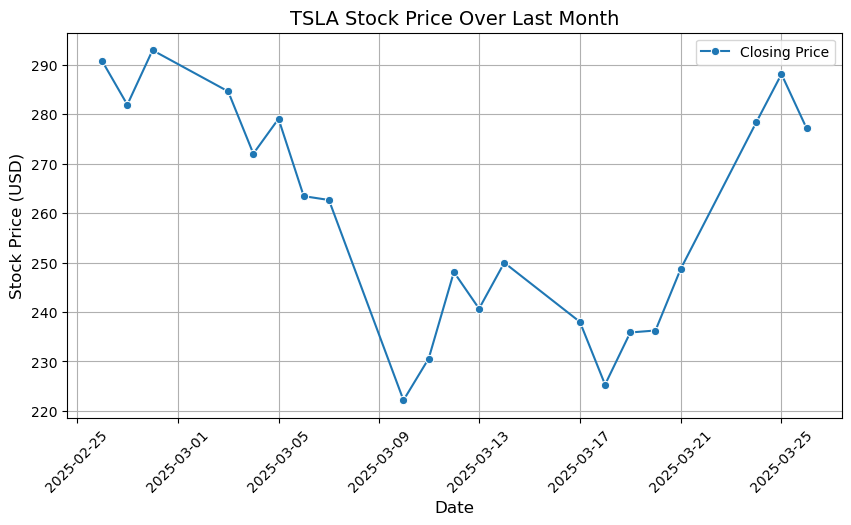

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Define stock symbol
stock_symbol = "TSLA"

# Fetch historical stock data
stock = yf.Ticker(stock_symbol)
data = stock.history(period="1mo")  # Fetch 1 month of data

# Plot the Closing Price
plt.figure(figsize=(10, 5))
sns.lineplot(x=data.index, y=data["Close"], marker="o", label="Closing Price")

plt.title(f"{stock_symbol} Stock Price Over Last Month", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Investing.com Forex rates page
url = 'https://www.investing.com/currencies/streaming-forex-rates-majors'

# Headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Send a GET request to the URL
response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the Forex rates
table = soup.find('table', {'class': 'datatable-v2_table__93S4Y dynamic-table-v2_dynamic-table__iz42m datatable-v2_table--mobile-basic__uC0U0 datatable-v2_table--freeze-column__uGXoD undefined'})

# Initialize lists to store the data
currencies = []
bid_prices = []
ask_prices = []
high_prices = []
low_prices = []
changes = []
change_percents = []

# Iterate over each row in the table
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    currencies.append(cols[0].text.strip())
    bid_prices.append(cols[1].text.strip())
    ask_prices.append(cols[2].text.strip())
    high_prices.append(cols[3].text.strip())
    low_prices.append(cols[4].text.strip())
    changes.append(cols[5].text.strip())
    change_percents.append(cols[6].text.strip())

# Create a DataFrame using the extracted data
df = pd.DataFrame({
    'Currency Pair': currencies,
    'Bid Price': bid_prices,
    'Ask Price': ask_prices,
    'High Price': high_prices,
    'Low Price': low_prices,
    'Change': changes,
    'Change Percent': change_percents
})

# Display the DataFrame
print(df)

# Save the DataFrame to a CSV file
df.to_csv('forex_rates.csv', index=False)


   Currency Pair Bid Price Ask Price High Price Low Price    Change  \
0                  EUR/USD    1.0751     1.0753    1.0803    1.0744   
1                  USD/JPY    150.55     150.56    150.75    149.84   
2                  GBP/USD    1.2888     1.2890    1.2950    1.2874   
3                  USD/TRY   37.9829    38.0026   38.0558   37.9510   
4                  USD/CHF    0.8844     0.8845    0.8851    0.8819   
5                  USD/CAD    1.4282     1.4284    1.4299    1.4235   
6                  EUR/JPY    161.86     161.88    162.61    161.64   
7                  AUD/USD    0.6290     0.6291    0.6331    0.6279   
8                  NZD/USD    0.5724     0.5726    0.5763    0.5715   
9                  EUR/GBP    0.8341     0.8343    0.8375    0.8333   
10                 EUR/CHF    0.9508     0.9511    0.9546    0.9506   
11                 AUD/JPY     94.69      94.72     95.19     94.27   
12                 GBP/JPY    194.05     194.08    194.79    193.48   
13    

In [3]:
!git init

Initialized empty Git repository in C:/Users/teka/web scraping  and data visulisation/.git/


In [9]:
!git add webscraping_rates.ipynb forex_rates.csv

In [11]:
!git commit -m "Add Forex rates scraper and data"

[master (root-commit) 87e99f0] Add Forex rates scraper and data
 2 files changed, 1236 insertions(+)
 create mode 100644 forex_rates.csv
 create mode 100644 webscraping_rates.ipynb


In [13]:
!git config --global user.name "jordan teka"
!git config --global user.email "jordanteka256@gmail.com"


In [17]:
!git remote add origin https://github.com/jordanteka/Web-Scraping-for-Financial-Data.git
!git branch -M main
!git push -u origin main

To https://github.com/jordanteka/Web-Scraping-for-Financial-Data.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/jordanteka/Web-Scraping-for-Financial-Data.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [19]:
!git pull origin main --rebase

error: cannot pull with rebase: You have unstaged changes.
error: Please commit or stash them.


In [23]:
!git add .

In [25]:
!git commit -m "Add Forex rates scraper and data"

[main 72414c1] Add Forex rates scraper and data
 4 files changed, 39 insertions(+), 140 deletions(-)
 create mode 100644 .ipynb_checkpoints/webscraping_rates-checkpoint.ipynb
 create mode 100644 stock_prices.csv
 create mode 100644 tsla_stock_data.csv


In [27]:
!git pull origin main --rebase
!git push origin main

error: cannot pull with rebase: You have unstaged changes.
error: Please commit or stash them.
To https://github.com/jordanteka/Web-Scraping-for-Financial-Data.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/jordanteka/Web-Scraping-for-Financial-Data.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [29]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   webscraping_rates.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
